In [1]:
import pandas as pd
import networkx as nx
from networkx.algorithms.bipartite.basic import density
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm
import random
import seaborn as sns

C:\Users\marek.furka\AppData\Local\Continuum\anaconda3new\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
listenings = pd.read_csv('preprocessed_data/listenings_with_years_and_users.csv',parse_dates=['timestamp'])
# we only take a look at songs released in the year 2005 and later (when the dataset begins)
listenings = listenings[listenings['year']>=2005]
# we create a unique identifier from artist and track name
listenings['art_tra_name'] = listenings['artname'] + '@' + listenings['traname']
# sort the listenings by time
listenings.sort_values(by='timestamp',inplace=True)
listenings.index=listenings['timestamp']
listenings.head()

,userid,timestamp,year,artname,traname,gender,country,art_tra_name
timestamp,,,,,,,,
2005-02-14 06:35:21+00:00,user_000235,2005-02-14 06:35:21+00:00,2005,The Boy Least Likely To,Be Gentle With Me,NaN,United States,The Boy Least Likely To@Be Gentle With Me
2005-02-14 10:34:54+00:00,user_000174,2005-02-14 10:34:54+00:00,2005,Airborn Audio,This Year,NaN,NaN,Airborn Audio@This Year
2005-02-14 12:50:49+00:00,user_000575,2005-02-14 12:50:49+00:00,2008,Fall Out Boy,Tell That Mick He Just Made My List Of Things ...,m,United States,Fall Out Boy@Tell That Mick He Just Made My Li...
2005-02-14 17:56:23+00:00,user_000235,2005-02-14 17:56:23+00:00,2005,Bright Eyes,When The President Talks To God,NaN,United States,Bright Eyes@When The President Talks To God
2005-02-14 18:06:14+00:00,user_000235,2005-02-14 18:06:14+00:00,2005,Bright Eyes,When The President Talks To God,NaN,United States,Bright Eyes@When The President Talks To God


In [3]:
top10Songs2006 = list(listenings[listenings['year']==2006].groupby('art_tra_name').count().sort_values('userid',ascending=False)[:10].index)
top10Songs2006

['Amy Winehouse@Rehab',
 'The Killers@When You Were Young',
 'Snow Patrol@Chasing Cars',
 'Amy Winehouse@Back To Black',
 'Klaxons@Golden Skans',
 'Amy Winehouse@Tears Dry On Their Own',
 'Amy Winehouse@Love Is A Losing Game',
 'Lily Allen@Smile',
 'Dirty Pretty Things@Deadwood',
 'The Killers@Read My Mind']

In [4]:
aggregatedTop10 = listenings[listenings['art_tra_name'].isin(top10Songs2006)].groupby([pd.Grouper(freq="M"), "art_tra_name"]).count()[['userid']].reset_index()

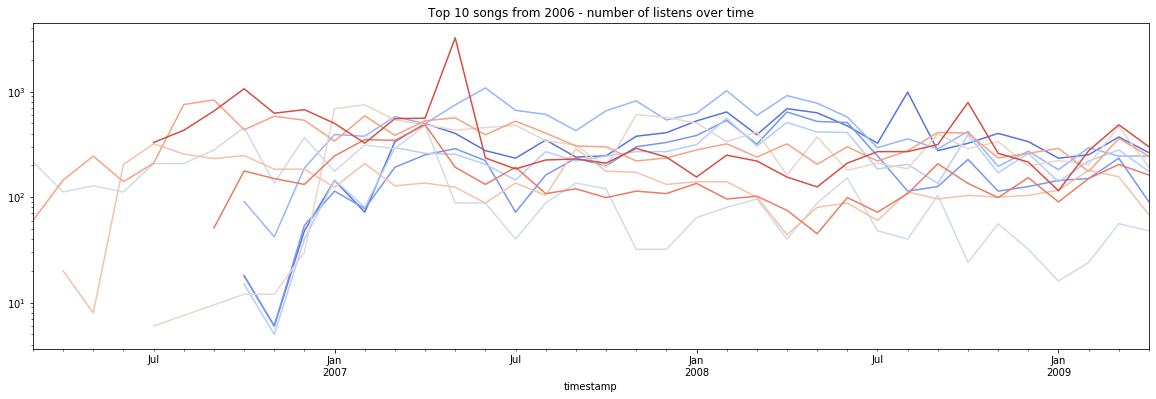

In [7]:
fig, ax= plt.subplots(figsize=(20,6))

colors = sns.color_palette("coolwarm", aggregatedTop10.art_tra_name.nunique())
ax.set_prop_cycle('color', colors)

for idx, gp in aggregatedTop10.groupby('art_tra_name'):
    gp.plot(x='timestamp', y='userid', ax=ax, legend=False)
plt.yscale('log', nonposy='clip')
plt.title('Top 10 songs from 2006 - number of listens over time')
plt.show()